In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import glob
from PIL import Image
from layers.convolution2d import Conv2D
from layers.maxpooling2d import MaxPool2D
from layers.fullyconnected import FC
from activations import Activation, get_activation
from optimizers.gradientdescent import GD
from losses.meansquarederror import MeanSquaredError
from model import Model
from optimizers.adam import Adam
from losses.binarycrossentropy import BinaryCrossEntropy

 **Read Images with cv2 and glob library**
 
 **k is number of image we use to train model from each file**

In [15]:
k = 10
base_dir_2 = '/Users/sarvinbaghi/Desktop/6/Neural Network/project1/ArtificialNeuralNetworks-ComputationalIntelligence-AUT/datasets/MNIST/2/*.jpg'
base_dir_5 = '/Users/sarvinbaghi/Desktop/6/Neural Network/project1/ArtificialNeuralNetworks-ComputationalIntelligence-AUT/datasets/MNIST/5/*.jpg'
images = np.empty((2000, 28, 28, 1))
i = 0
for filename in glob.glob(base_dir_2):
    img=cv2.imread(filename, 0)
    images[i, :, :, 0] = img
    if (i == k):
        break
for filename in glob.glob(base_dir_5):
    img=cv2.imread(filename, 0)
    images[i, :, :, 0] = img
    i += 1
    if (i == 2*k):
        break

**Make True Y**

In [16]:
Y = np.empty(2*k)
Y[0:k].fill(0)
Y[k:2*k].fill(1)

**Model has 2 convolutional layer with Maxpool layer after each convolutional layer and activation of both type of layer is linear.
Last layer is fully connected layer with sigmoid activation function
loose function of model is MSE and optimizer is Adam**

In [17]:
layer1 = Conv2D(1, 5, "l1")
activation1 = get_activation("linear")
layer2 = MaxPool2D()
activation2 = get_activation("linear")
layer3 = Conv2D(5, 5, "l3")
activation3 = get_activation("linear")
layer4 = MaxPool2D()
activation4 = get_activation("linear")
layer5= FC(2880, 1, "l5")
activation5 = get_activation("sigmoid")
epochs = 10
arch = {"l1" : layer1, "a1" : activation1, "l2" : layer2, "a2" : activation2, "l3" : layer3, "a3" : activation3,  "l4" : layer4, "a4" : activation4,  "l5" : layer5, "a5" : activation5}
layers_list = {"l1" : layer1, "l3" : layer3, "l5" : layer5}
loos_function = MeanSquaredError()
optimizer = Adam(layers_list)
model = Model(arch, loos_function, optimizer)
train_cost, val_cost = model.train(images[0:2*k], Y.T, epochs, shuffling=True)

 10%|█         | 1/10 [00:02<00:25,  2.87s/it]

Epoch 0: train cost = 1.699849083567802


 20%|██        | 2/10 [00:05<00:23,  2.90s/it]

Epoch 1: train cost = 2.0276010608366533


 30%|███       | 3/10 [00:08<00:20,  2.89s/it]

Epoch 2: train cost = 1.48533188238364


 40%|████      | 4/10 [00:11<00:17,  2.89s/it]

Epoch 3: train cost = 1.5657505005340902


 50%|█████     | 5/10 [00:14<00:14,  2.90s/it]

Epoch 4: train cost = 1.1805517586020693


 60%|██████    | 6/10 [00:17<00:11,  2.91s/it]

Epoch 5: train cost = 0.9837740893663224


 70%|███████   | 7/10 [00:20<00:08,  2.90s/it]

Epoch 6: train cost = 0.7535812366166112


 80%|████████  | 8/10 [00:23<00:05,  2.90s/it]

Epoch 7: train cost = 0.797647823125403


 90%|█████████ | 9/10 [00:26<00:02,  2.90s/it]

Epoch 8: train cost = 0.6666861560373427


100%|██████████| 10/10 [00:28<00:00,  2.90s/it]

Epoch 9: train cost = 0.5726085754854219


**Result of model in plot mode**

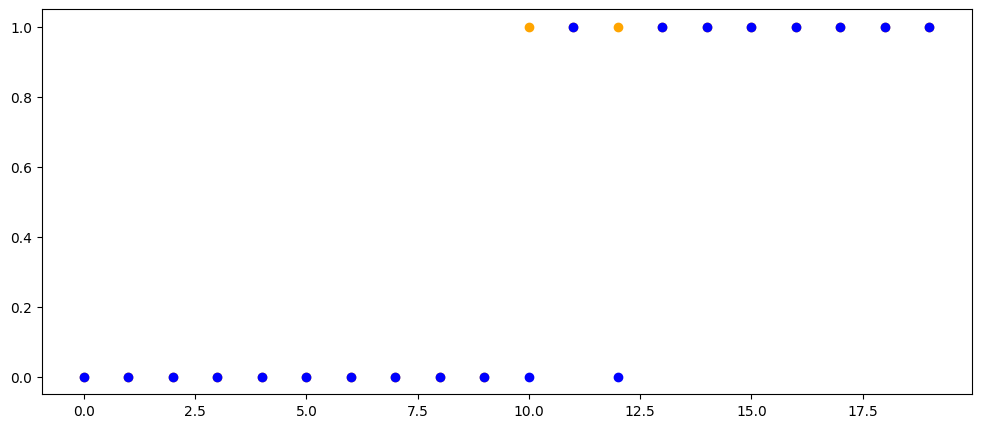

In [21]:
y_pred = np.asarray(model.predict(images[0:2*k])[9]).reshape((2*k, 1))

for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
stop = 2*k
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
xpoints = np.asanyarray(range(stop))
axs.plot(xpoints, np.asarray(Y).reshape((2*k, 1))[0:stop], 'o', color="orange")
axs.plot(xpoints, y_pred[0:stop], 'o', color="blue")

In [22]:
print(Y)
print(y_pred.T)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]]
